In this project, the goal is to predict machine failure using sensor data from a milling machine. The target variable for prediction is "Machine failure," which indicates whether a machine has failed.

### LOAD DATASET
The dataset contains various features, including unique identifiers, product IDs, machine types, sensor data (temperature, speed, torque), tool wear, and failure types.



In [14]:
import pandas as pd

file_path = 'data/ai4i2020.csv'
df = pd.read_csv(file_path)

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding fitur kategori
le_product_id = LabelEncoder()
df['Product ID'] = le_product_id.fit_transform(df['Product ID'])

le_type = LabelEncoder()
df['Type'] = le_type.fit_transform(df['Type'])

# Scaling
scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,2,1003,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,3,1004,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,4,1005,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,5,1006,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0


### Exploratory Data Analysis (EDA)

visualize the distribution of the target variable Tool wear [min] and the correlation matrix.

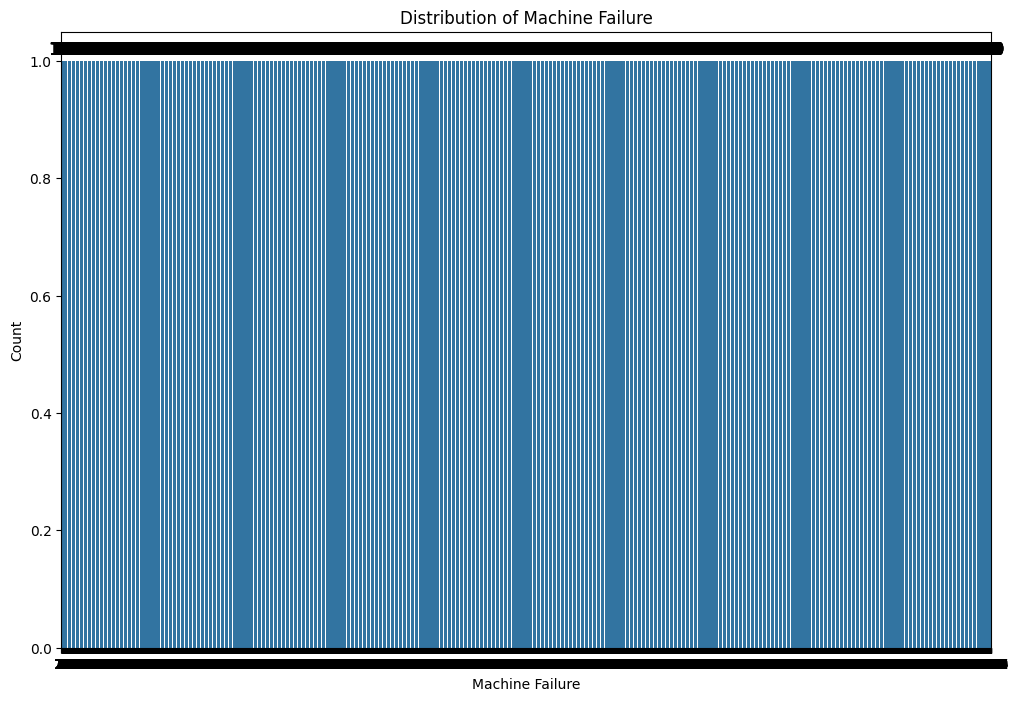

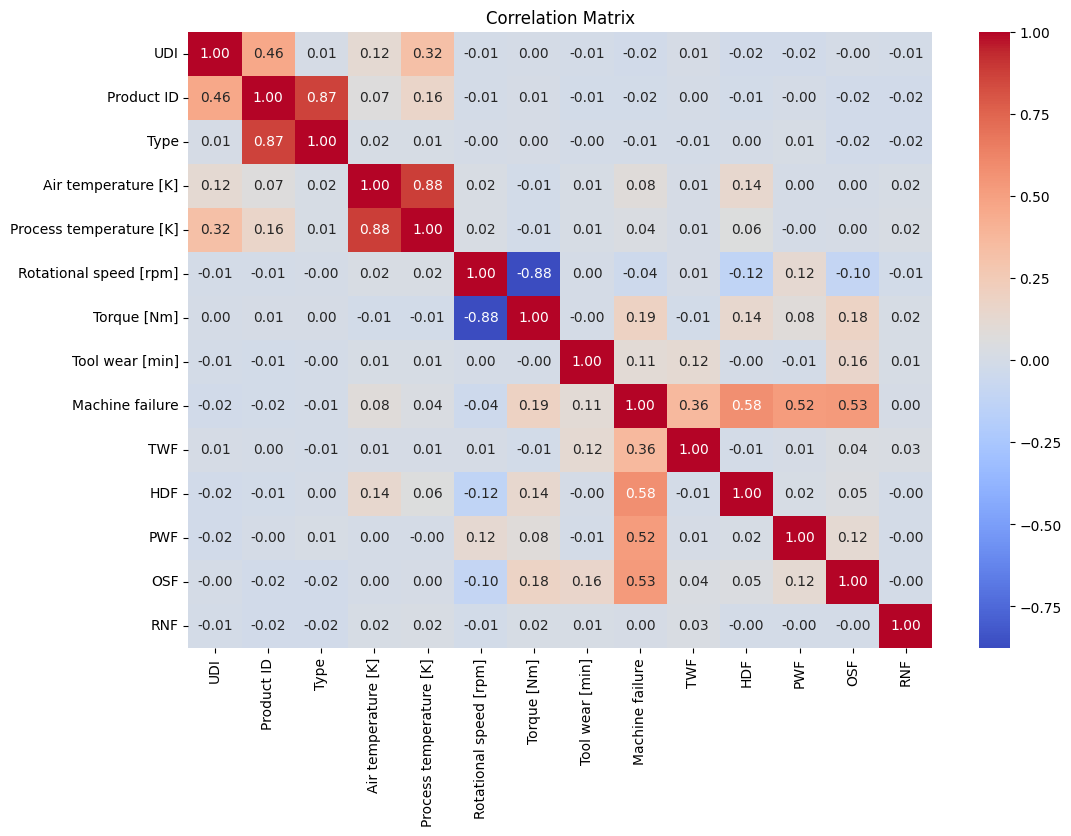

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.countplot(df['Machine failure'])
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


# matriks korelasi
correlation_matrix = df.corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The plot shows a class imbalance, with more instances of "No Failure" compared to "Failure." This imbalance may affect model performance and will need to be addressed during modeling.

### Model Development 
Approach 1: Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the dataset into features and target variable
X = df.drop(columns=['UDI', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest Classifier Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluating the models
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_report_logreg = classification_report(y_test, y_pred_logreg)
classification_report_rf = classification_report(y_test, y_pred_rf)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

(accuracy_logreg, accuracy_rf), (classification_report_logreg, classification_report_rf), (confusion_matrix_logreg, confusion_matrix_rf)


c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((0.9715, 0.9845),
 ('              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      1939\n           1       0.61      0.18      0.28        61\n\n    accuracy                           0.97      2000\n   macro avg       0.79      0.59      0.63      2000\nweighted avg       0.96      0.97      0.96      2000\n',
  '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1939\n           1       0.83      0.62      0.71        61\n\n    accuracy                           0.98      2000\n   macro avg       0.91      0.81      0.85      2000\nweighted avg       0.98      0.98      0.98      2000\n'),
 (array([[1932,    7],
         [  50,   11]], dtype=int64),
  array([[1931,    8],
         [  23,   38]], dtype=int64)))

In [18]:
#print result
import pprint
pp = pprint.PrettyPrinter(indent=4)

print("Accuracy Report:")
pp.pprint(accuracy_logreg)
pp.pprint(accuracy_rf)

print("Classification Report:")
pp.pprint(classification_report_logreg)
pp.pprint(classification_report_rf)

print("\nConfusion Matrix:")
print(confusion_matrix_logreg)
print(confusion_matrix_rf)

Accuracy Report:
0.9715
0.9845
Classification Report:
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.97      1.00      0.99      1939\n'
 '           1       0.61      0.18      0.28        61\n'
 '\n'
 '    accuracy                           0.97      2000\n'
 '   macro avg       0.79      0.59      0.63      2000\n'
 'weighted avg       0.96      0.97      0.96      2000\n')
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      1.00      0.99      1939\n'
 '           1       0.83      0.62      0.71        61\n'
 '\n'
 '    accuracy                           0.98      2000\n'
 '   macro avg       0.91      0.81      0.85      2000\n'
 'weighted avg       0.98      0.98      0.98      2000\n')

Confusion Matrix:
[[1932    7]
 [  50   11]]
[[1931    8]
 [  23   38]]


## INSIGHT
 # Accuracy
- Both models achieve high accuracy, with the Random Forest Classifier achieving slightly higher accuracy (98.45%) compared to Logistic Regression (97.15%).
 # Precision, Recall, and F1-Score:
- For class 0 (No Failure), both models perform very well, achieving near-perfect scores.
- For class 1 (Failure), the Random Forest Classifier significantly outperforms Logistic Regression in terms of precision, recall, and F1-score. This indicates that the Random Forest model is better at identifying machine failures, even though it has a lower false negative rate compared to Logistic Regression.
 # Confusion Matrix:
- Logistic Regression has 50 false negatives, meaning it missed 50 instances of machine failure. It only correctly identified 11 out of 61 failures.
- Random Forest Classifier has 23 false negatives and correctly identified 38 out of 61 failures. This shows a significant improvement in detecting machine failures compared to Logistic Regression.

### Handling Class Imbalance with SMOTE and Training a Random Forest Classifier

In [19]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pprint


# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)
confusion_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

pp = pprint.PrettyPrinter(indent=4)

print("Best Parameters for Random Forest:")
pp.pprint(best_params)

print("\nAccuracy Report for Best Random Forest Model:")
pp.pprint(accuracy_best_rf)

print("\nClassification Report for Best Random Forest Model:")
pp.pprint(classification_report_best_rf)

print("\nConfusion Matrix for Best Random Forest Model:")
print(confusion_matrix_best_rf)


c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\arsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

Best Parameters for Random Forest:
{   'criterion': 'entropy',
    'max_depth': None,
    'max_features': 'sqrt',
    'n_estimators': 200}

Accuracy Report for Best Random Forest Model:
0.95

Classification Report for Best Random Forest Model:
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.96      0.97      1939\n'
 '           1       0.35      0.74      0.47        61\n'
 '\n'
 '    accuracy                           0.95      2000\n'
 '   macro avg       0.67      0.85      0.72      2000\n'
 'weighted avg       0.97      0.95      0.96      2000\n')

Confusion Matrix for Best Random Forest Model:
[[1855   84]
 [  16   45]]


In [21]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Random Forest Classifier Model with best parameters
best_rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train_smote, y_train_smote)

y_pred_rf = best_rf.predict(X_test)

# Evaluating
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)


In [22]:
# Print results
pp = pprint.PrettyPrinter(indent=4)

print("\nBest Parameters for Random Forest:")
pp.pprint({
    'criterion': 'entropy',
    'max_depth': None,
    'max_features': 'sqrt',
    'n_estimators': 200
})

print("\nAccuracy Report for Best Random Forest Model:")
pp.pprint(accuracy_rf)

print("\nClassification Report for Best Random Forest Model:")
pp.pprint(classification_report_rf)

print("\nConfusion Matrix for Best Random Forest Model:")
print(confusion_matrix_rf)


Best Parameters for Random Forest:
{   'criterion': 'entropy',
    'max_depth': None,
    'max_features': 'sqrt',
    'n_estimators': 200}

Accuracy Report for Best Random Forest Model:
0.95

Classification Report for Best Random Forest Model:
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.96      0.97      1939\n'
 '           1       0.35      0.74      0.47        61\n'
 '\n'
 '    accuracy                           0.95      2000\n'
 '   macro avg       0.67      0.85      0.72      2000\n'
 'weighted avg       0.97      0.95      0.96      2000\n')

Confusion Matrix for Best Random Forest Model:
[[1855   84]
 [  16   45]]


The model has high accuracy primarily due to the high number of non-failures. However, the precision for detecting failures is quite low (35%), meaning that many of the predicted failures are actually non-failures.


The results show that applying SMOTE and training a Random Forest classifier has indeed improved the performance.
- The Random Forest classifier, combined with SMOTE, shows improved precision, recall, and F1-scores, especially for the minority class.
- The confusion matrix gives a clearer view of the model's performance in correctly predicting each class.

In summary, while the model performs well overall, there is room for improvement, especially in increasing the precision for detecting failures. Balancing the dataset more effectively and exploring other models and features could help achieve better performance.